In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [99]:
def bike_injury_to_int(injury):
    if injury == 'O: No Injury':
        return 0
    elif injury == 'B: Suspected Minor Injury':
        return 1
    elif injury == 'C: Possible Injury':
        return 2
    elif injury == 'A: Suspected Serious Injury':
        return 3
    elif injury == 'K: Killed':
        return 4
    else:
        return -1
    
def crash_day_to_int(day):
    if day == 'Monday':
        return 1
    elif day == 'Tuesday':
        return 2
    elif day == 'Wednesday':
        return 3
    elif day == 'Thursday':
        return 4
    elif day == 'Friday':
        return 5
    elif day == 'Saturday':
        return 6
    elif day == 'Sunday':
        return 7
    else:
        return -1
    
def crash_month_to_int(month):
    if month == 'January':
        return 1
    elif month == 'February':
        return 2
    elif month == 'March':
        return 3
    elif month == 'April':
        return 4
    elif month == 'May':
        return 5
    elif month == 'June':
        return 6
    elif month == 'July':
        return 7
    elif month == 'August':
        return 8
    elif month == 'September':
        return 9
    elif month == 'October':
        return 10
    elif month == 'November':
        return 11
    elif month == 'December':
        return 12
    else:
        return -1

In [ ]:
columns = ['BikeAge', 'BikeDir', 'BikeInjury', 'BikePos', 'BikeRace', 'BikeSex', 'CrashDay', 'CrashGrp', 'CrashHour', 'CrashLoc', 'CrashMonth', 'DrvrVehTyp', 'LightCond', 'Locality', 'NumLanes', 'RdCharacte', 'RdClass', 'RdConditio', 'RdConfig', 'RdFeature', 'RdSurface', 'Region', 'SpeedLimit', 'TraffCntrl', 'Weather']

In [ ]:
data = pd.read_csv('../data/NCDOT_BikePedCrash.csv')
data = data[columns]
data = data[data.BikeInjury != 'Unknown Injury']

FileNotFoundError: [Errno 2] No such file or directory: 'data/NCDOT_BikePedCrash.csv'

In [102]:
data['BikeSex_Male'] = data.BikeSex == 'Male'
data['BikeSex_Male'] = data['BikeSex_Male'].astype(int)
data = data.drop(columns=['BikeSex'])
data['BikeNoInjury'] = data.BikeInjury == 'O: No Injury'
data['BikeNoInjury'] = data['BikeNoInjury'].astype(int)
data['BikeKilled'] = data.BikeInjury == 'K: Killed'
data['BikeKilled'] = data['BikeKilled'].astype(int)
data['BikeInjury'] = data['BikeInjury'].apply(bike_injury_to_int)
data['CrashDay'] = data['CrashDay'].apply(crash_day_to_int)
data['CrashMonth'] = data['CrashMonth'].apply(crash_month_to_int)

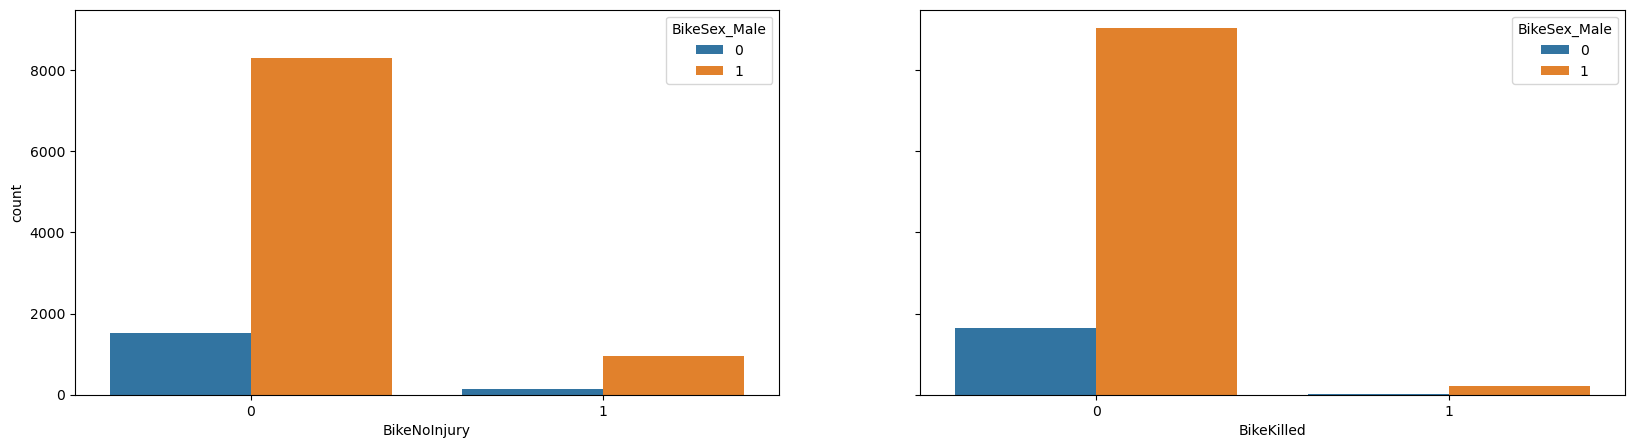

In [103]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 5))
sns.countplot(
                data = data,
                x='BikeNoInjury',
                hue='BikeSex_Male',
                ax=ax1)
sns.countplot(
                data = data,
                x='BikeKilled',
                hue='BikeSex_Male',
                ax=ax2)
plt.show()

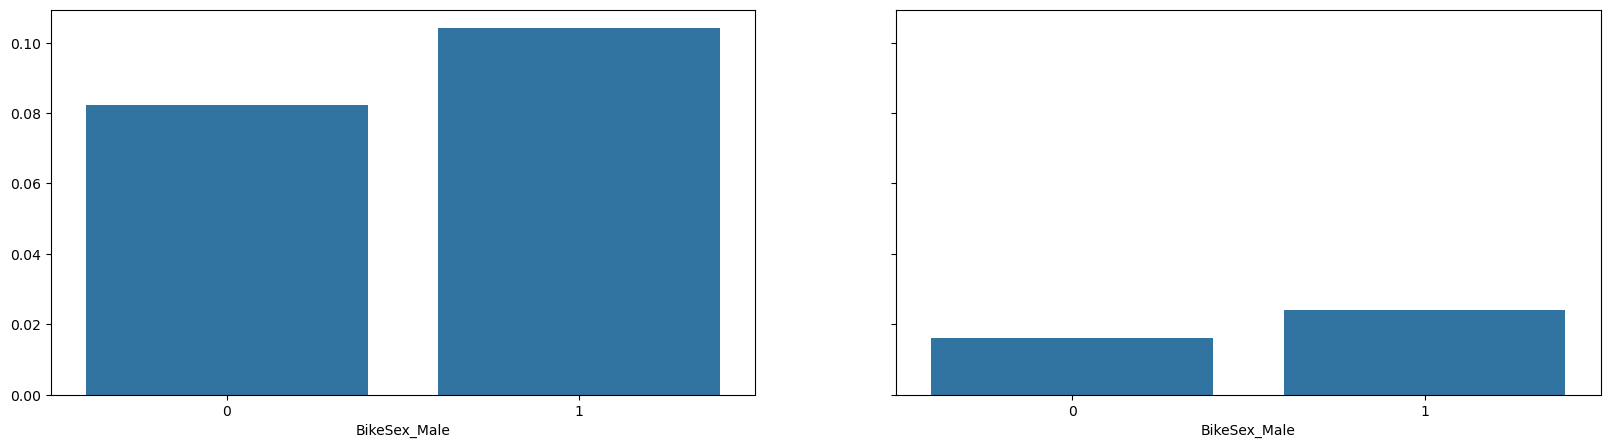

In [122]:
data_rel_sex_no_injury = data[data.BikeNoInjury == 1].value_counts('BikeSex_Male') / data.value_counts('BikeSex_Male')
data_rel_sex_killed = data[data.BikeKilled == 1].value_counts('BikeSex_Male') / data.value_counts('BikeSex_Male')

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 5))
sns.barplot(
                x=data_rel_sex_no_injury.index,
                y=data_rel_sex_no_injury.values,
                ax=ax1)
sns.barplot(
                x=data_rel_sex_killed.index,
                y=data_rel_sex_killed.values,
                ax=ax2)
plt.show()

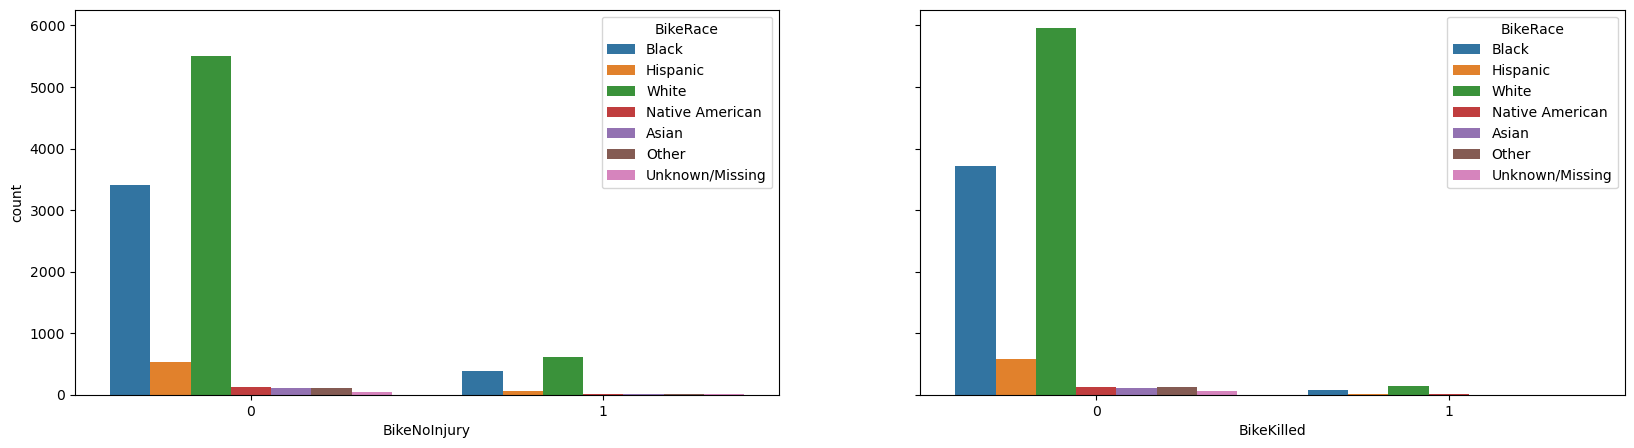

In [104]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 5))
sns.countplot(
                data = data,
                x='BikeNoInjury',
                hue='BikeRace',
                ax=ax1)
sns.countplot(
                data = data,
                x='BikeKilled',
                hue='BikeRace',
                ax=ax2)
plt.show()

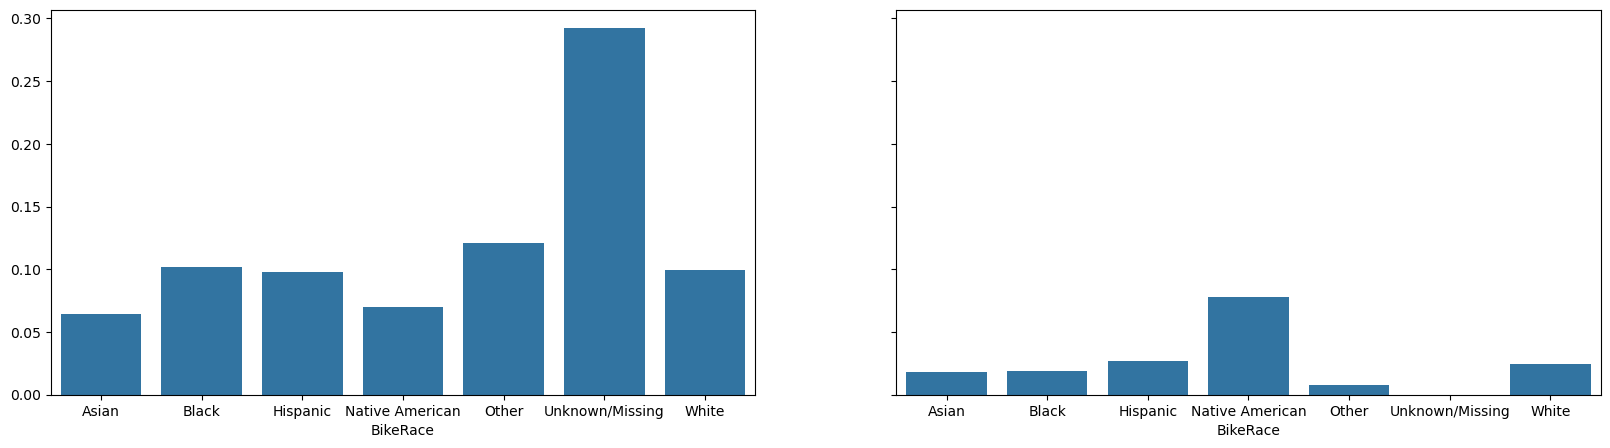

In [120]:
data_rel_race_no_injury = data[data.BikeNoInjury == 1].value_counts('BikeRace') / data.value_counts('BikeRace')
data_rel_race_killed = data[data.BikeKilled == 1].value_counts('BikeRace') / data.value_counts('BikeRace')

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 5))
sns.barplot(
                x=data_rel_race_no_injury.index,
                y=data_rel_race_no_injury.values,
                ax=ax1)
sns.barplot(
                x=data_rel_race_killed.index,
                y=data_rel_race_killed.values,
                ax=ax2)
plt.show()

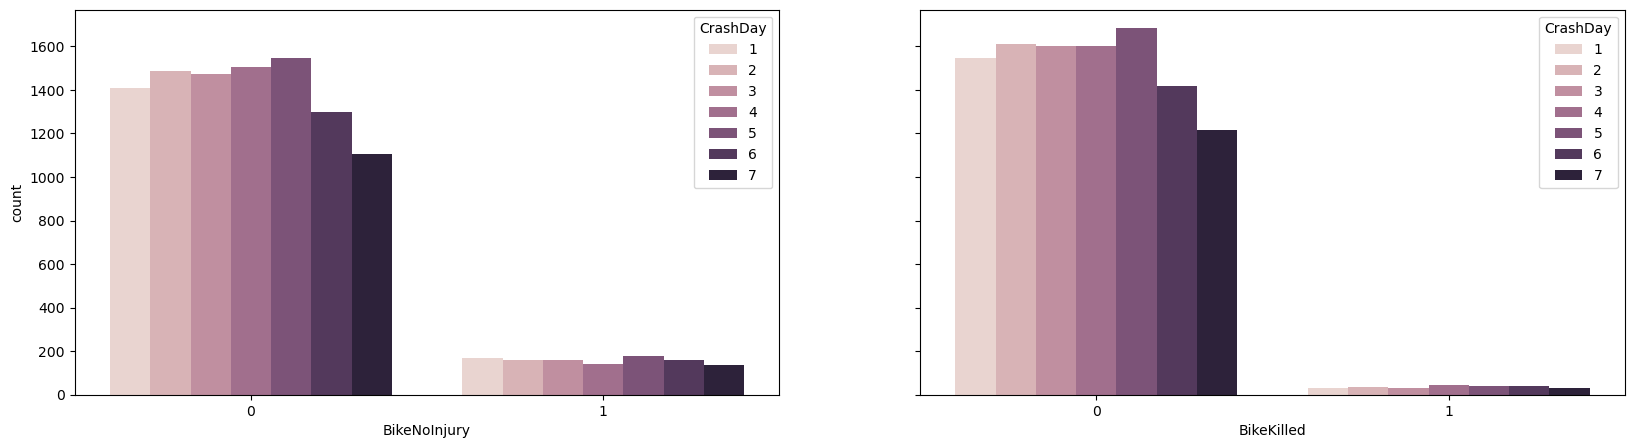

In [105]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 5))
sns.countplot(
                data = data,
                x='BikeNoInjury',
                hue='CrashDay',
                ax=ax1)
sns.countplot(
                data = data,
                x='BikeKilled',
                hue='CrashDay',
                ax=ax2)
plt.show()

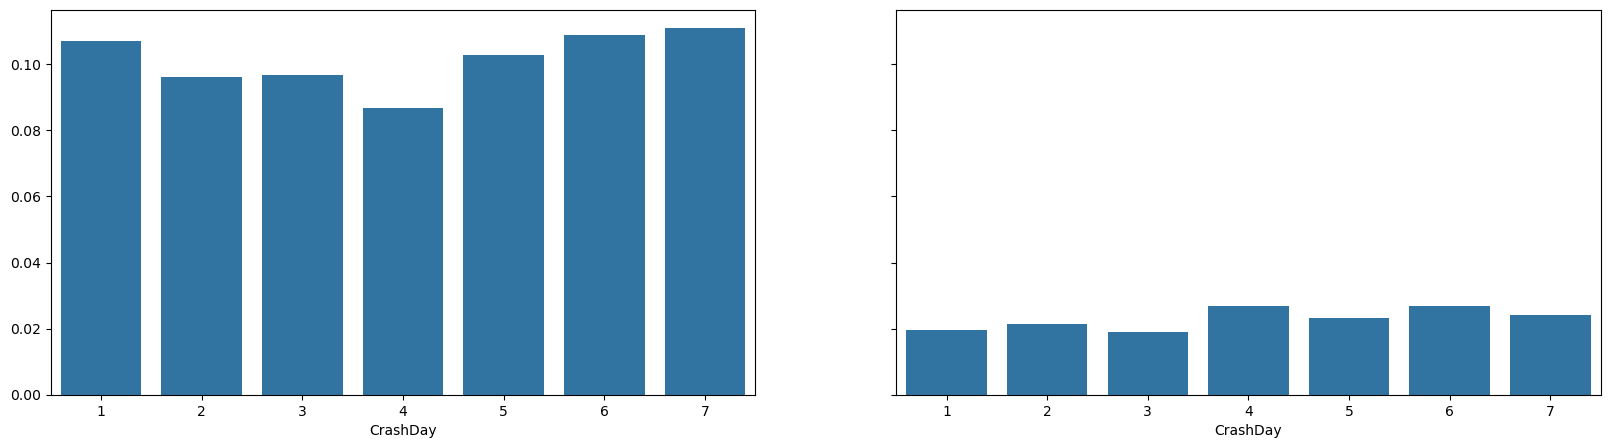

In [119]:
data_rel_day_no_injury = data[data.BikeNoInjury == 1].value_counts('CrashDay') / data.value_counts('CrashDay')
data_rel_day_killed = data[data.BikeKilled == 1].value_counts('CrashDay') / data.value_counts('CrashDay')

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 5))
sns.barplot(
                x=data_rel_day_no_injury.index,
                y=data_rel_day_no_injury.values,
                ax=ax1)
sns.barplot(
                x=data_rel_day_killed.index,
                y=data_rel_day_killed.values,
                ax=ax2)
plt.show()

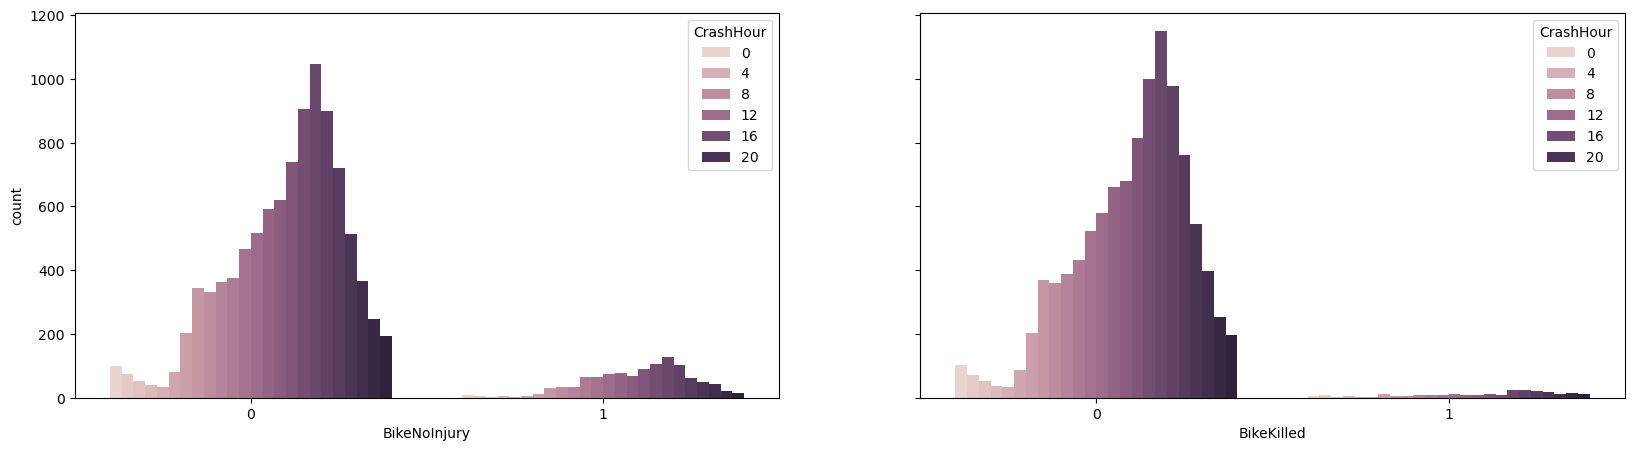

In [116]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 5))
sns.countplot(
                data = data,
                x='BikeNoInjury',
                hue='CrashHour',
                ax=ax1)
sns.countplot(
                data = data,
                x='BikeKilled',
                hue='CrashHour',
                ax=ax2)
plt.show()

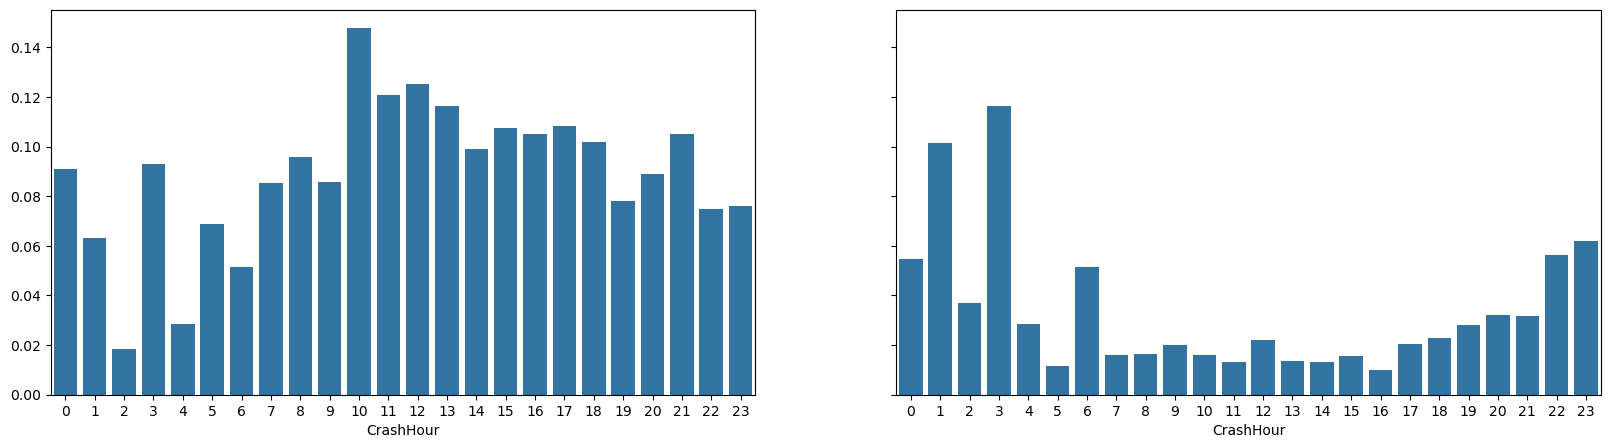

In [115]:
data_rel_hour_no_injury = data[data.BikeNoInjury == 1].value_counts('CrashHour') / data.value_counts('CrashHour')
data_rel_hour_killed = data[data.BikeKilled == 1].value_counts('CrashHour') / data.value_counts('CrashHour')

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 5))
sns.barplot(
                x=data_rel_hour_no_injury.index,
                y=data_rel_hour_no_injury.values,
                ax=ax1)
sns.barplot(
                x=data_rel_hour_killed.index,
                y=data_rel_hour_killed.values,
                ax=ax2)
plt.show()

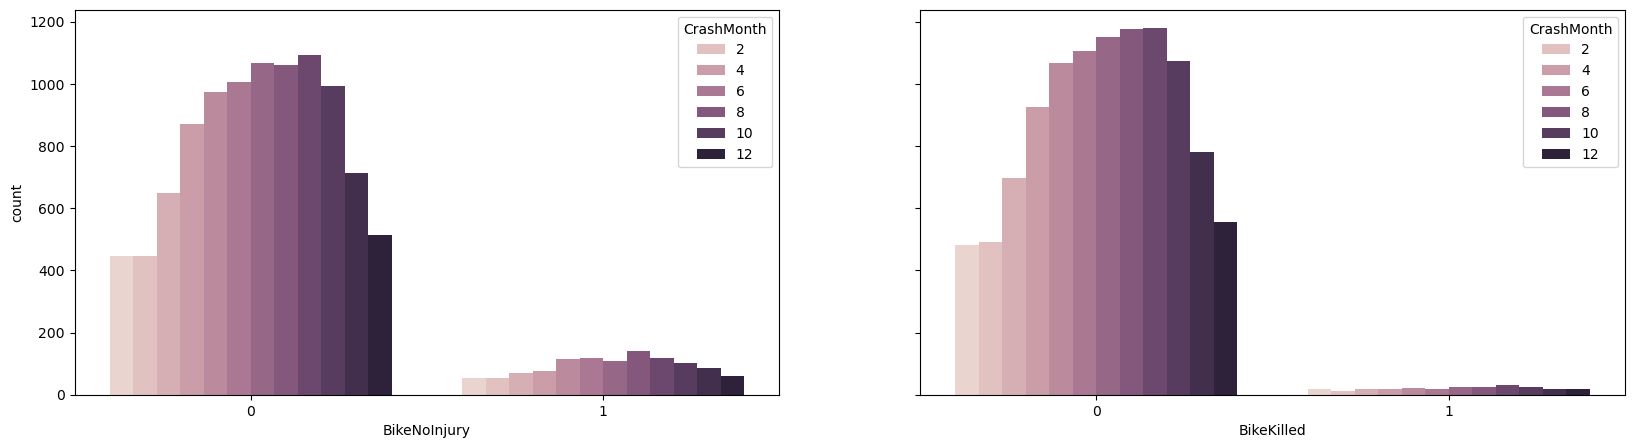

In [117]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 5))
sns.countplot(
                data = data,
                x='BikeNoInjury',
                hue='CrashMonth',
                ax=ax1)
sns.countplot(
                data = data,
                x='BikeKilled',
                hue='CrashMonth',
                ax=ax2)
plt.show()

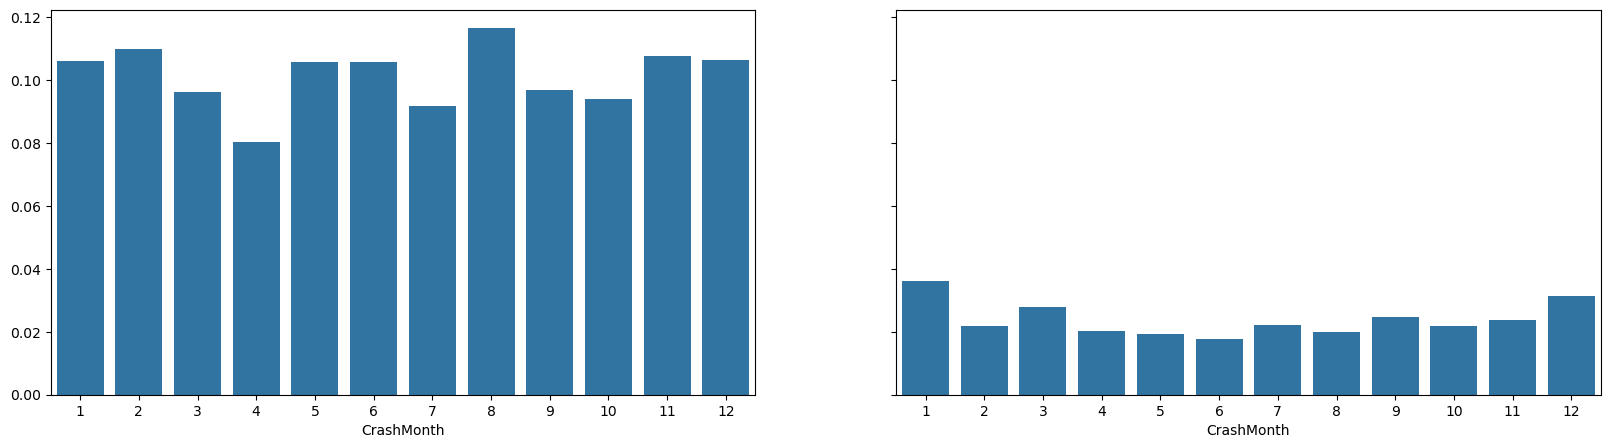

In [118]:
data_rel_month_no_injury = data[data.BikeNoInjury == 1].value_counts('CrashMonth') / data.value_counts('CrashMonth')
data_rel_month_killed = data[data.BikeKilled == 1].value_counts('CrashMonth') / data.value_counts('CrashMonth')

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 5))
sns.barplot(
                x=data_rel_month_no_injury.index,
                y=data_rel_month_no_injury.values,
                ax=ax1)
sns.barplot(
                x=data_rel_month_killed.index,
                y=data_rel_month_killed.values,
                ax=ax2)
plt.show()

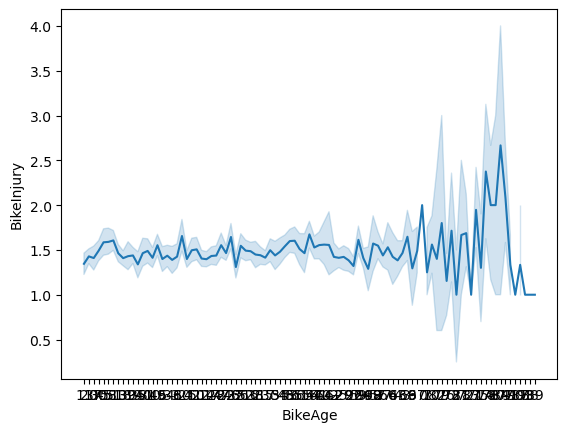

In [45]:
sns.lineplot(
                data = data,
                x='BikeAge',
                y='BikeInjury')
plt.show()

In [33]:
for column in data.columns:
    print(data.value_counts(column))
    print()

BikeAgeGrp
50-59      1572
40-49      1555
20-24      1369
30-39      1306
11-15      1298
16-19      1140
25-29       939
6-10        720
60-69       690
70+         184
0-5         109
Unknown      45
Name: count, dtype: int64

BikeDir
With Traffic      6593
Facing Traffic    2638
Not Applicable    1281
Unknown            415
Name: count, dtype: int64

BikeInjury
1    4660
2    4338
0    1102
3     577
4     250
Name: count, dtype: int64

BikePos
Travel Lane                                 6820
Sidewalk / Crosswalk / Driveway Crossing    1942
Bike Lane / Paved Shoulder                   652
Non-Roadway                                  598
Unknown                                      477
Driveway / Alley                             273
Other                                         86
Multi-use Path                                79
Name: count, dtype: int64

BikeRace
White              6107
Black              3791
Hispanic            594
Other               132
Native American     129